In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

2024-03-09 13:20:41.327083: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# soldata = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/3407241?format=original&gbrecs=true')
# had to rehost because dataverse isn't reliable
soldata = pd.read_csv(
    "https://github.com/whitead/dmol-book/raw/main/data/curated-solubility-dataset.csv"
)
features_start_at = list(soldata.columns).index("MolWt")
feature_names = soldata.columns[features_start_at:]
# standardize the features
soldata[feature_names] -= soldata[feature_names].mean()
soldata[feature_names] /= soldata[feature_names].std()

In [25]:
full_data = tf.data.Dataset.from_tensor_slices(
    (soldata[feature_names].values, soldata["Solubility"].values)
)
N = len(soldata)
test_N = int(0.1 * N)
test_data = full_data.take(test_N).batch(16)
train_data = full_data.skip(test_N).batch(16)

In [26]:
# our hidden layer
# We only need to define the output dimension - 32.
hidden_layer = tf.keras.layers.Dense(32, activation="tanh")
# Last layer - which we want to output one number
# the predicted solubility.
output_layer = tf.keras.layers.Dense(1)

# Now we put the layers into a sequential model
model = tf.keras.Sequential()
model.add(hidden_layer)
model.add(output_layer)

# our model is complete

# Try out our model on first few datapoints
model(soldata[feature_names].values[:3])

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.60888946],
       [-0.35181838],
       [-0.24846041]], dtype=float32)>

In [28]:
model.compile(optimizer="SGD", loss="mean_squared_error")
model.fit(train_data, epochs=50)

Epoch 1/50
562/562 [==============================] - 1s 1ms/step - loss: 2.0179
Epoch 2/50
562/562 [==============================] - 1s 2ms/step - loss: 1.5876
Epoch 3/50
562/562 [==============================] - 1s 2ms/step - loss: 1.5038
Epoch 4/50
562/562 [==============================] - 1s 1ms/step - loss: 1.4484
Epoch 5/50
562/562 [==============================] - 1s 2ms/step - loss: 1.4138
Epoch 6/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3904
Epoch 7/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3730
Epoch 8/50
562/562 [==============================] - 1s 3ms/step - loss: 1.3592
Epoch 9/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3476
Epoch 10/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3378
Epoch 11/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3298
Epoch 12/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3229
Epoch 13/50
562/562 [====

In [29]:
# squeeze to remove extra dimensions
yhat = np.squeeze(model.predict(test_data))
test_y = soldata["Solubility"].values[:test_N]

63/63 [==============================] - 0s 2ms/step


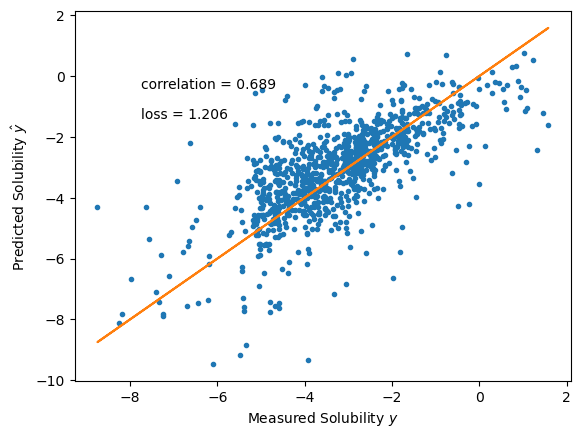

In [31]:
plt.plot(test_y, yhat, ".")
plt.plot(test_y, test_y, "-")
plt.xlabel("Measured Solubility $y$")
plt.ylabel("Predicted Solubility $\hat{y}$")
plt.text(
    min(test_y) + 1,
    max(test_y) - 2,
    f"correlation = {np.corrcoef(test_y, yhat)[0,1]:.3f}",
)
plt.text(
    min(test_y) + 1,
    max(test_y) - 3,
    f"loss = {np.sqrt(np.mean((test_y - yhat)**2)):.3f}",
)
plt.show()

In [52]:
##this version has an extra hidden layer
# our hidden layer
# We only need to define the output dimension - 32.
hidden_layer1 = tf.keras.layers.Dense(32, activation="tanh")
hidden_layer2 = tf.keras.layers.Dense(32, activation="tanh")
# Last layer - which we want to output one number
# the predicted solubility.
output_layer = tf.keras.layers.Dense(1)

# Now we put the layers into a sequential model
model = tf.keras.Sequential()
model.add(hidden_layer1)
model.add(hidden_layer2)
model.add(output_layer)

# our model is complete

# Try out our model on first few datapoints
model(soldata[feature_names].values[:3])

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.3695734 ],
       [0.4174295 ],
       [0.20756152]], dtype=float32)>

In [53]:
model.compile(optimizer="SGD", loss="mean_squared_error")
model.fit(train_data, epochs=50)

Epoch 1/50


562/562 [==============================] - 2s 2ms/step - loss: 1.8493
Epoch 2/50
562/562 [==============================] - 1s 2ms/step - loss: 1.4426
Epoch 3/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3469
Epoch 4/50
562/562 [==============================] - 1s 2ms/step - loss: 1.3004
Epoch 5/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2763
Epoch 6/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2625
Epoch 7/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2530
Epoch 8/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2454
Epoch 9/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2388
Epoch 10/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2328
Epoch 11/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2278
Epoch 12/50
562/562 [==============================] - 1s 2ms/step - loss: 1.2233
Epoch 13/50
562/562 [===============

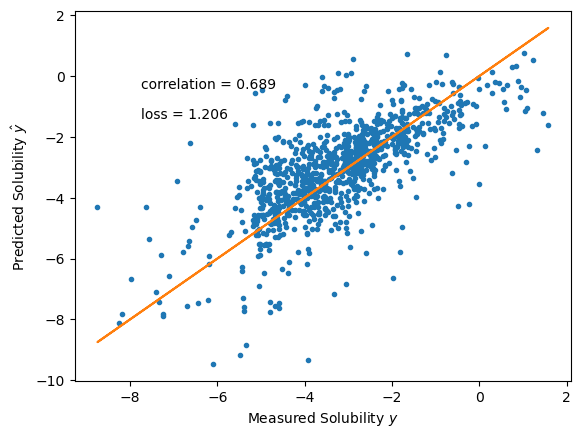

In [34]:
plt.plot(test_y, yhat, ".")
plt.plot(test_y, test_y, "-")
plt.xlabel("Measured Solubility $y$")
plt.ylabel("Predicted Solubility $\hat{y}$")
plt.text(
    min(test_y) + 1,
    max(test_y) - 2,
    f"correlation = {np.corrcoef(test_y, yhat)[0,1]:.3f}",
)
plt.text(
    min(test_y) + 1,
    max(test_y) - 3,
    f"loss = {np.sqrt(np.mean((test_y - yhat)**2)):.3f}",
)
plt.show()

In [46]:
len(model.weights)

6

In [51]:
model.weights[4]

<tf.Variable 'dense_8/kernel:0' shape=(32, 1) dtype=float32, numpy=
array([[-0.02886295],
       [ 0.38043177],
       [ 0.28420037],
       [ 0.17938632],
       [ 0.1349132 ],
       [-0.19953917],
       [-0.23331454],
       [-0.02550051],
       [ 0.06058651],
       [-0.21507923],
       [ 0.18349993],
       [-0.2343998 ],
       [ 0.20508105],
       [-0.3242243 ],
       [-0.36198837],
       [-0.24272631],
       [ 0.18340248],
       [-0.02146196],
       [-0.09534821],
       [ 0.00795648],
       [ 0.00207239],
       [-0.13315895],
       [ 0.20137984],
       [ 0.35888135],
       [-0.37044075],
       [-0.2536559 ],
       [-0.07233658],
       [ 0.29317266],
       [ 0.2661757 ],
       [-0.37205535],
       [ 0.41939938],
       [-0.13353246]], dtype=float32)>

In [44]:
help(tf.keras.layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of t

In [41]:
model.weights[3]

<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([-3.0250328], dtype=float32)>